# Learn to use Auto-Sklearn

In [1]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.11.1


## Multi-label Classification Model
This examples shows how to format the targets for a multilabel classification problem.

In [1]:
import numpy as np

import sklearn.datasets
import sklearn.metrics
from sklearn.utils.multiclass import type_of_target

import autosklearn.classification

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


### 1. Data Loading

In [4]:
# Load a example dataset

# Using reuters multilabel dataset -- https://www.openml.org/d/40594
X, Y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)

# fetch openml downloads a numpy array with TRUE/FALSE strings. Re-map it to
# integer dtype with ones and zeros
# This is to comply with Scikit-learn requirement:
# "Positive classes are indicated with 1 and negative classes with 0 or -1."
# More information on: https://scikit-learn.org/stable/modules/multiclass.html
Y[Y == 'TRUE'] = 1
Y[Y == 'FALSE'] = 0
Y = Y.astype(np.int)

# Using type of target is a good way to make sure your data
# is properly formatted
print(f"type_of_target={type_of_target(Y)}")

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)

type_of_target=multilabel-indicator


### 2. Building the classifier

In [6]:
# Create Classification model
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60,
                                                          per_run_time_limit=30,
                                                          # Bellow two flags are provided to speed up calculations
                                                          # Not recommended for a real implementation
                                                          initial_configurations_via_metalearning=0,
                                                          smac_scenario_args={'runcount_limit': 1})
# Train model
automl.fit(X_train, Y_train, dataset_name='reuters')

[WARNING] [2020-11-13 11:19:17,542:AutoML(1):reuters] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
[WARNING] [2020-11-13 11:19:20,761:AutoML(1):reuters] No valid ensemble was created. Please check the logfile for errors. Default to the best individual estimator:[(1, 2, 0.0)]


/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(dask_client=None,
                      delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=0,
                      load_models=None, logging_config=None,
                      max_models_on_disc=50, memory_limit=3072,
                      metadata_directory=None, metric=None, n_jobs=None,
                      output_folder=None, per_run_time_limit=30,
                      resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      smac_scenario_args={'runcount_limit': 1},
                      time_l

### 3. Print the final ensemble constructed by auto-sklearn

In [7]:
print('\n\n--- MODELS: ---')
print(automl.show_models())



--- MODELS: ---
[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessin

### 4. Print statistics about the auto-sklearn run

In [8]:
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: reuters
  Metric: f1_macro
  Best validation score: 0.552850
  Number of target algorithm runs: 1
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



### 5. Predict and get the Score of the final ensemble

In [10]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(Y_test, predictions))

Accuracy score 0.606


### 6. Visualization Data

In [12]:
import matplotlib.pyplot as plt

([array([334.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 108.]),
  array([463.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  37.]),
  array([499.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([494.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.]),
  array([498.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
  array([463.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  37.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7 Lists of Patches objects>)

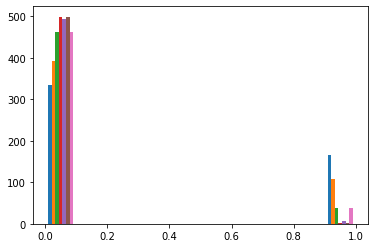

In [13]:
plt.hist(predictions)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")

In [ ]:
plt.figure(figsize=(14, 12))

plot_subfigure(Y_test, predictions, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(Y_test, predictions, 2, "With unlabeled samples + PCA", "pca")